In [32]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import random

In [33]:
# read in the data
data = pd.read_csv("shm_data.csv")
length_training = data.loc[:, "Length"].to_numpy()
print(length_training.shape)
period_training = data.loc[:, "Period"].to_numpy()

(999,)


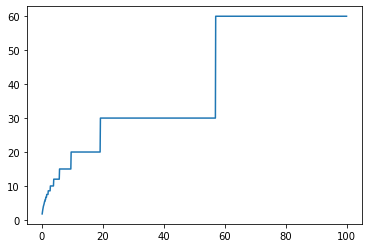

In [34]:
# curious to see how a plot of this looks
plt.plot(length_training, period_training)
# ok... something has gone wrong with the dataset
# we can fix that later
# let's build the model while we're here

In [51]:
# build the model
tf.random.set_seed(71)

model = tf.keras.Sequential([tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(64, activation="relu"),
tf.keras.layers.Dense(32, activation="relu"),
tf.keras.layers.Dense(16, activation="relu"),
tf.keras.layers.Dense(8, activation="relu"),
tf.keras.layers.Dense(1, activation="linear")
])
model.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

class haltCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') <= 10):
            self.model.stop_training = True

stopCallback = haltCallback()

model.fit(tf.expand_dims(length_training, axis=1), tf.expand_dims(period_training, axis=1), epochs=2000, callbacks=[stopCallback])

Epoch 1/5000
32/32 [==============================] - 0s 663us/step - loss: 40.3175 - mae: 40.3175
Epoch 2/5000
32/32 [==============================] - 0s 578us/step - loss: 41.0161 - mae: 41.0161
Epoch 3/5000
32/32 [==============================] - 0s 597us/step - loss: 39.7440 - mae: 39.7440
Epoch 4/5000
32/32 [==============================] - 0s 585us/step - loss: 39.1291 - mae: 39.1291
Epoch 5/5000
32/32 [==============================] - 0s 624us/step - loss: 38.8088 - mae: 38.8088
Epoch 6/5000
32/32 [==============================] - 0s 620us/step - loss: 38.4885 - mae: 38.4885
Epoch 7/5000
32/32 [==============================] - 0s 677us/step - loss: 38.1688 - mae: 38.1688
Epoch 8/5000
32/32 [==============================] - 0s 622us/step - loss: 37.8488 - mae: 37.8488
Epoch 9/5000
32/32 [==============================] - 0s 609us/step - loss: 37.5282 - mae: 37.5282
Epoch 10/5000
32/32 [==============================] - 0s 568us/step - loss: 37.2056 - mae: 37.2056
Epoch 11/

KeyboardInterrupt: 

In [43]:
# let's see how the model does
print(model.predict([0.001]))
# at least it's smaller than 0.1...
print((model.predict([900])))
# need to fix issues with training data...
# something about the numerical integration is wacky

1/1 [==============================] - 0s 54ms/step
[[30.156132]]
1/1 [==============================] - 0s 56ms/step
[[43.523563]]


1/1 [==============================] - 0s 17ms/step


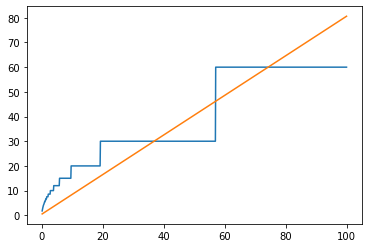

In [37]:
plt.plot(length_training, period_training)
period_predictions = []
for k in length_training:
    period_predictions.append(model.predict([k])[0][0])

plt.plot(length_training, period_predictions)